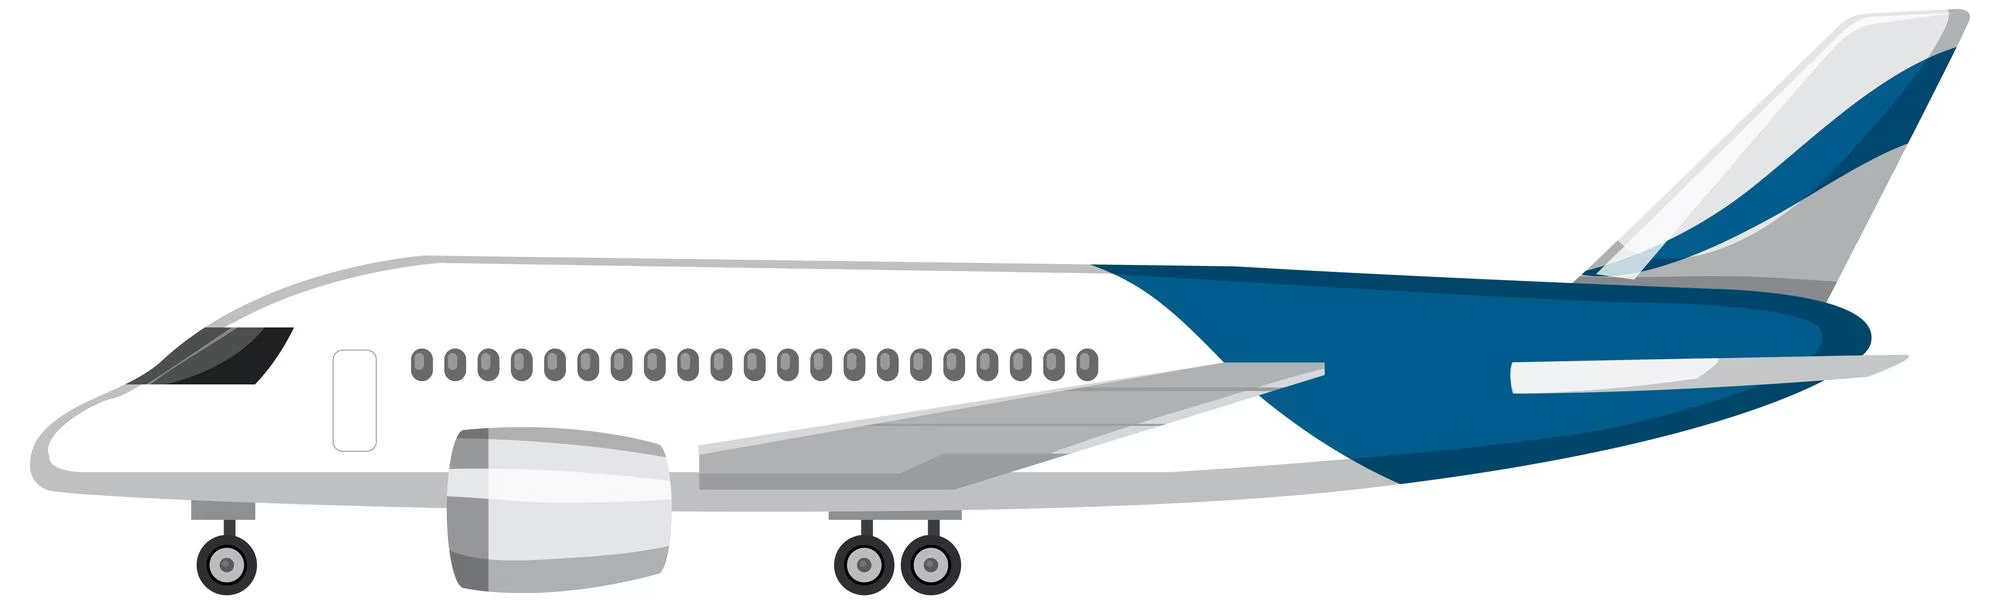

## __In the era of global travel, ensuring a delightful flying experience for passengers is a top priority for airlines. Airlines strive to understand the factors taht contribute to passenger satisfaction and dissatisfaction. In this context, I'm tasked with developing a predictive model that can determine the key factors strongly correlated with passenger satisfaction and dissatisfaction, and unlitmately predict whether a passenger is likely to be satisfied or dissatisfied based on various attributes.__

#### __CONTENT:__
- ##### _Gender: Gender of the passengers (Female, Male)_
- ##### _Customer Type: The customer type (Loyal customer, disloyal customer)_
- ##### _Age: The actual age of the passengers_
- ##### _Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)_
- ##### _Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)_
- ##### _Flight distance: The flight distance of this journey_
- ##### _(0:Not Applicable;1-5)_
- ##### _Inflight wifi service: Satisfaction level of the inflight wifi service_
- ##### _Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient_
- ##### _Ease of Online booking: Satisfaction level of online booking_
- ##### _Gate location: Satisfaction level of Gate location_
- ##### _Food and drink: Satisfaction level of Food and drink_
- ##### _Online boarding: Satisfaction level of online boarding_
- ##### _Seat comfort: Satisfaction level of Seat comfort_
- ##### _Inflight entertainment: Satisfaction level of inflight entertainment_
- ##### _On-board service: Satisfaction level of On-board service_
- ##### _Leg room service: Satisfaction level of Leg room service_
- ##### _Baggage handling: Satisfaction level of baggage handling_
- ##### _Check-in service: Satisfaction level of Check-in service_
- ##### _Inflight service: Satisfaction level of inflight service_
- ##### _Cleanliness: Satisfaction level of Cleanliness_
- ##### _Departure Delay in Minutes: Minutes delayed when departure_
- ##### _Arrival Delay in Minutes: Minutes delayed when Arrival_
- ##### _Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [3]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
print('Our training set has {} rows and {} columns'. format(train_df.shape[0], train_df.shape[1]))
print('Our test set has {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

Our training set has 103904 rows and 24 columns
Our test set has 25976 rows and 24 columns


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [6]:
train_df.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [8]:
missing_no = train_df.isnull().sum()
missing_percentage = train_df.isnull().sum()/ train_df.count()
missing_df = pd.DataFrame({"#Missing": missing_no, "%Missing": missing_percentage}).sort_values(by='#Missing', ascending=False)
missing_df

,#Missing,%Missing
Arrival Delay in Minutes,310,0.002992
id,0,0.000000
Gender,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


### __CONCLUSION__
- #### _We have a pretty large dataset and a good training set but I am going to use the test data as the cv data instead._
- #### _Most of our features don't have missing values except Arrival Delay in Minutes. But only  a few is missing so maybe I'll drop it or find a way in the future to impute the missing values_

In [11]:
# i just want to group the dataset into their various value types
train_df.drop(columns='id', inplace=True)
test_df.drop(columns='id', axis=1, inplace=True)
continous_features = train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
nominal_features = train_df[['Gender', 'satisfaction', 'Type of Travel', 'Customer Type']]
ordinal_features = train_df[[column for column in train_df.columns if column not in continous_features.columns and column not in nominal_features.columns]]

In [12]:
continous_features

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0
...,...,...,...,...
103899,23,192,3,0.0
103900,49,2347,0,0.0
103901,30,1995,7,14.0
103902,22,1000,0,0.0


In [13]:
nominal_features

,Gender,satisfaction,Type of Travel,Customer Type
0,Male,neutral or dissatisfied,Personal Travel,Loyal Customer
1,Male,neutral or dissatisfied,Business travel,disloyal Customer
2,Female,satisfied,Business travel,Loyal Customer
3,Female,neutral or dissatisfied,Business travel,Loyal Customer
4,Male,satisfied,Business travel,Loyal Customer
...,...,...,...,...
103899,Female,neutral or dissatisfied,Business travel,disloyal Customer
103900,Male,satisfied,Business travel,Loyal Customer
103901,Male,neutral or dissatisfied,Business travel,disloyal Customer
103902,Female,neutral or dissatisfied,Business travel,disloyal Customer


In [14]:
ordinal_features

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


#### _So I'm just going to train a baseline model with shitty missing data imputation and like no feature engineering, no feature scaling, nothing._

In [15]:
train_df_raw = train_df.copy()
test_df_raw = test_df.copy()

In [26]:
test_df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [27]:
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)
test_df['Arrival Delay in Minutes'].fillna(test_df['Arrival Delay in Minutes'].median(), inplace=True)

In [37]:
train_df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,3,2,3,0.0,0,1,0,1,0,0
103900,49,2347,4,4,4,4,2,4,5,5,...,5,4,0,0.0,1,0,0,0,0,1
103901,30,1995,1,1,1,3,4,1,5,4,...,5,4,7,14.0,1,1,0,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,4,1,0,0.0,0,1,0,1,0,0


In [34]:
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [60]:
test_df

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,19556,52,160,5,4,3,4,3,4,3,...,5,5,50,44.0,0,0,0,1,0,1
1,90035,36,2863,1,1,3,1,5,4,5,...,4,5,0,0.0,0,0,0,0,0,1
2,12360,20,192,2,0,2,4,2,2,2,...,2,2,0,0.0,1,1,0,1,0,0
3,77959,44,3377,0,0,0,2,3,4,4,...,1,4,0,6.0,1,0,0,0,0,1
4,36875,49,1182,2,3,4,3,4,1,2,...,2,4,0,20.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,34,526,3,3,3,1,4,3,4,...,5,4,0,0.0,1,1,0,0,0,0
25972,71167,23,646,4,4,4,4,4,4,4,...,5,4,0,0.0,1,0,0,0,0,1
25973,37675,17,828,2,5,1,5,2,1,2,...,4,2,0,0.0,0,0,1,1,0,0
25974,90086,14,1127,3,3,3,3,4,4,4,...,5,4,0,0.0,1,0,0,0,0,1


#### _So, let's mmove to training our model_

In [53]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV, train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
X = train_df.drop('satisfaction_satisfied', axis=1)
y = train_df['satisfaction_satisfied']

In [65]:
X_cv = test_df.drop('satisfaction_satisfied', axis=1)
y_cv = test_df['satisfaction_satisfied']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20082005)

In [50]:
# Fit LogisticRegression
logit_reg = LogisticRegression(max_iter=1500)
logit_reg.fit(X_train, y_train)

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1500)

In [86]:
# model performance
scores_logit_reg = cross_val_score(logit_reg, X_train, y_train, cv=5)

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [87]:
y_test_pred = logit_reg.predict(X_test)
print(f'CV scores for Logistic Regression model: {scores_logit_reg}')
print(f'CV accuracy for Logistic Regression model: {np.mean(scores_logit_reg)} +/- {np.std(scores_logit_reg)}')

CV scores for Logistic Regression model: [0.87085714 0.87639098 0.87019549 0.87187199 0.8675409 ]
CV accuracy for Logistic Regression model: 0.8713713012077836 +/- 0.0028902135622839516


LogisticRegression score on test set: 0.8669457677686349
LogisticRegression MSE on test set: 0.1330542322313652


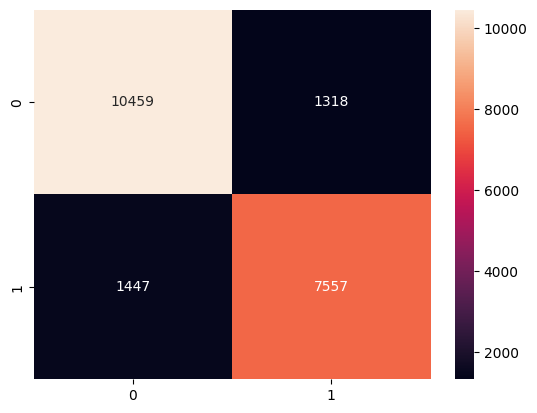

In [88]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'LogisticRegression score on test set: {logit_reg.score(X_test, y_test)}')
print(f'LogisticRegression MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

#### _So, We can see that our LogisticRegression model did quite alright, it didn't really underfit and there is no overfitting as the score on the test set is quite close to the ones gotten from our cross_val_score step. But I think there is still room for improvement._

In [89]:
random_forestclf = RandomForestClassifier()
random_forestclf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
# model performance
scores_randomforest = cross_val_score(random_forestclf, X_train, y_train, cv=5)

In [91]:
y_test_pred = random_forestclf.predict(X_test)
print(f'CV scores for RandomForestClassifier: {scores_randomforest}')
print(f'CV accuracy for RandomForestClassifier: {np.mean(scores_randomforest)} +/- {np.std(scores_randomforest)}')

CV scores for RandomForestClassifier: [0.95945865 0.96156391 0.96366917 0.96053898 0.96204283]
CV accuracy for RandomForestClassifier: 0.961454707751091 +/- 0.0014201750762766893


LogisticRegression score on test set: 0.9586641643809248
LogisticRegression MSE on test set: 0.04133583561907512


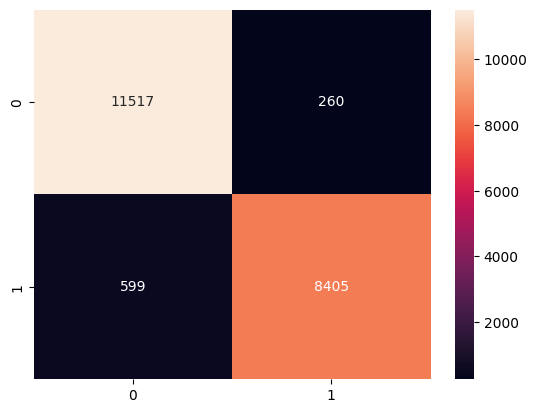

In [92]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.5g')
print(f'LogisticRegression score on test set: {random_forestclf.score(X_test, y_test)}')
print(f'LogisticRegression MSE on test set: {mean_squared_error(y_test, y_test_pred)}')

#### _Wow, the scores are unbelievable. I think we should just go home because we have a whooping 95+ accuraccy which is far better than logistic regression. The model doesn't underfit the data because both the scores on the training and test set are high and there is no overfitting because the score on the test set is also very similar to the ones gotten from the cross_val_score_